In [1]:
from datetime import date, timedelta

today = date.today()
end_date = today.strftime("%Y-%m-%d")

start_date = today - timedelta(days = 100)
start_date = start_date.strftime("%Y-%m-%d")

start_date, end_date

('2024-01-14', '2024-04-23')

In [2]:
import yfinance as yf

data = yf.download("BTC-USD", start = start_date, end = end_date, progress = False)

data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-14,42842.261719,43065.597656,41724.613281,41796.269531,41796.269531,17521429522
2024-01-15,41715.066406,43319.722656,41705.417969,42511.968750,42511.968750,22320220558
2024-01-16,42499.335938,43566.273438,42085.996094,43154.945312,43154.945312,24062872740
2024-01-17,43132.101562,43189.890625,42189.308594,42742.652344,42742.652344,20851232595
2024-01-18,42742.312500,42876.347656,40631.171875,41262.058594,41262.058594,25218357242
...,...,...,...,...,...,...
2024-04-18,61275.316406,64125.687500,60833.480469,63512.753906,63512.753906,36006307335
2024-04-19,63510.750000,65481.597656,59651.390625,63843.570312,63843.570312,49920425401
2024-04-20,63851.101562,65442.457031,63172.402344,64994.441406,64994.441406,23097485495


In [3]:
data["Date"] = data.index
data.reset_index(drop = True, inplace = True)

data

,Open,High,Low,Close,Adj Close,Volume,Date
0,42842.261719,43065.597656,41724.613281,41796.269531,41796.269531,17521429522,2024-01-14
1,41715.066406,43319.722656,41705.417969,42511.968750,42511.968750,22320220558,2024-01-15
2,42499.335938,43566.273438,42085.996094,43154.945312,43154.945312,24062872740,2024-01-16
3,43132.101562,43189.890625,42189.308594,42742.652344,42742.652344,20851232595,2024-01-17
4,42742.312500,42876.347656,40631.171875,41262.058594,41262.058594,25218357242,2024-01-18
...,...,...,...,...,...,...,...
95,61275.316406,64125.687500,60833.480469,63512.753906,63512.753906,36006307335,2024-04-18
96,63510.750000,65481.597656,59651.390625,63843.570312,63843.570312,49920425401,2024-04-19
97,63851.101562,65442.457031,63172.402344,64994.441406,64994.441406,23097485495,2024-04-20
98,64992.816406,65723.242188,64277.722656,64926.644531,64926.644531,20506644853,2024-04-21


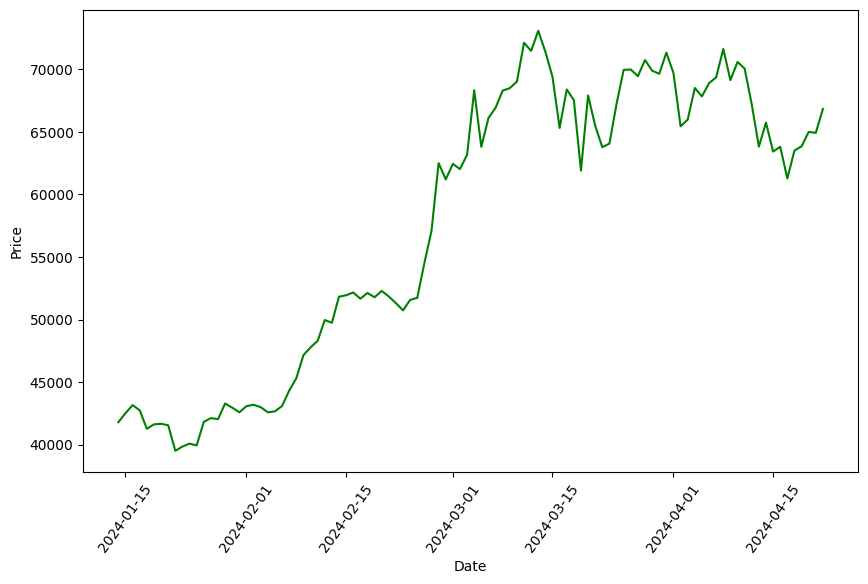

In [4]:
import matplotlib.pyplot as plt

dates = data["Date"]
prices = data["Adj Close"]

plt.figure(figsize = (10, 6))
plt.plot(dates, prices, color = "green")

plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation = 54)
plt.show()

#### Create training dataset

* Input: sequence of label values
* Output: the next label value of the sequence

Create window of value sequence, move it by 1 step

[(1, 2, 3, 4), {5}, 6, 7, 8, 9] => [1, (2, 3, 4, 5), {6}, 7, 8, 9]

* Serie defined by [ ]
* Input of values sequence defined by ( )
* Output of next value defined by { }

In [57]:
import numpy as np

def create_dataset(serie, window_size = 20):
  x, y = [], []

  for i in range(len(serie) - window_size):
    input = serie[i: i + window_size, 0]
    x.append(input)
    y.append([serie[i + window_size, 0]])

  return np.array(x), np.array(y)

In [61]:
from sklearn.preprocessing import MinMaxScaler

serie = data[["Adj Close"]]

scaler = MinMaxScaler(feature_range = (0, 1))
serie = scaler.fit_transform(serie)

x, y = create_dataset(serie)

In [62]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [74]:
from keras.models import Sequential
from keras.layers import Input, Dense, LSTM

model = Sequential([
  # input shape is (window_size, 1)
  Input(shape = (20, 1)),
  LSTM(units = 32, dropout = 0.1, activation = "relu"),
  Dense(1, activation = "relu")
])

model.compile(optimizer = "adam", loss = "mean_squared_error")

In [75]:
model_output = model.fit(x_train, y_train, batch_size = 8, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.3537 - val_loss: 0.2964
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2846 - val_loss: 0.1595
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1205 - val_loss: 0.0378
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0313 - val_loss: 0.0363
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0536 - val_loss: 0.0204
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0486 - val_loss: 0.0265
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0470 - val_loss: 0.0234
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0752 - val_loss: 0.0201
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0278 - val_loss: 0.0195
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0481 - val_loss: 0.0200


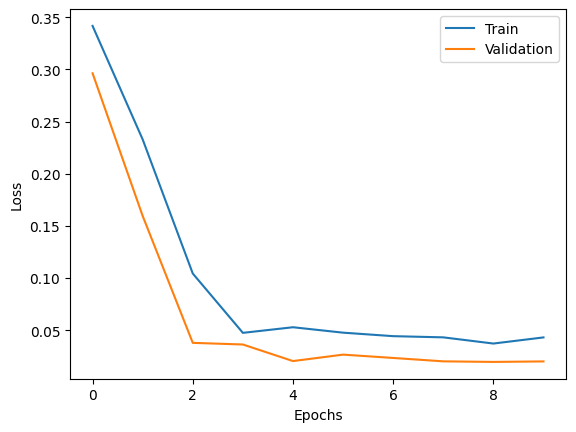

In [76]:
plt.plot(model_output.history["loss"], label = "Train")
plt.plot(model_output.history["val_loss"], label = "Validation")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [104]:
days_to_predict = 10
predictions = []

sample_data = [x[-1]]

sample_data = np.array(sample_data)

for _ in range(days_to_predict):
  prediction = model.predict([sample_data])
  predictions.append(prediction[0])

  sample_data = np.append(sample_data, [prediction[0]], axis = 1)
  # all rows, all items but the first one
  sample_data = sample_data[:, 1:]

predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


[array([0.753758], dtype=float32),
 array([0.75106686], dtype=float32),
 array([0.74856496], dtype=float32),
 array([0.7456763], dtype=float32),
 array([0.74322855], dtype=float32),
 array([0.74069846], dtype=float32),
 array([0.7381567], dtype=float32),
 array([0.7352182], dtype=float32),
 array([0.73303545], dtype=float32),
 array([0.73049], dtype=float32)]

In [105]:
predictions = np.array(predictions, dtype = object)
predictions = scaler.inverse_transform(predictions)

predictions

array([[64815.64634882],
       [64725.28794868],
       [64641.28365531],
       [64544.29296862],
       [64462.10785101],
       [64377.15694583],
       [64291.81378713],
       [64193.15202039],
       [64119.86265225],
       [64034.39741465]])

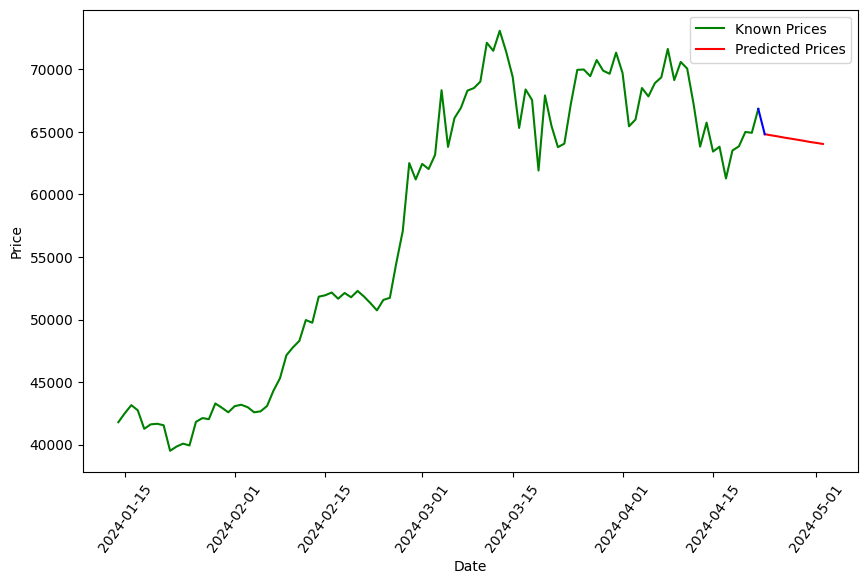

In [122]:
import pandas as pd

known_dates = data["Date"].values
known_prices = data["Adj Close"].values

predicted_dates = pd.date_range(start = today, periods = days_to_predict)
predicted_prices = predictions

plt.figure(figsize = (10, 6))
plt.plot(known_dates, known_prices, color = "green", label = "Known Prices")
plt.plot(predicted_dates, predicted_prices, color = "red", label = "Predicted Prices")
plt.plot([known_dates[-1], predicted_dates[0]], [known_prices[-1], predicted_prices[0][0]], color = "blue")

plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation = 54)

plt.legend()
plt.show()